# Finding the Best Two Markets to Advertise In

Our e-learning company offers courses on programming. Most of our courses are on web and mobile development, but we also cover many other domains, like data science, game development, etc. We want to promote our product and we'd like to invest some money in advertisement. Our goal in this project is to find out the two best markets to advertise our product in.

In [17]:
# import libraries

import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# set pandas options to ensure the DataFrame output isn't truncated

pd.set_option('max_columns', 150)

---

## Understanding the Data

Our first step is to get data. This would require us to organize surveys in several different markets to find out which would be the best choices for advertising. This is a very costly route, so we should explore cheaper options by looking at existing datasets.

A good candidate is the data from [freeCodeCamp's 2017 New Coder Survey]. [freeCodeCamp] is a free e-learning platform that offers courses on web development. Because they run a popular [Medium publication] (over 400,000 followers), their survey attracted new coders with varying interests (not only web development), which is ideal for the purpose of our analysis.

The survey data is publicly available in this [GitHub repository].

[freeCodeCamp's 2017 New Coder Survey]: https://medium.freecodecamp.org/we-asked-20-000-people-who-they-are-and-how-theyre-learning-to-code-fff5d668969
[freeCodeCamp]: https://www.freecodecamp.org/
[Medium publication]: https://medium.freecodecamp.org/
[Github repository]: https://github.com/freeCodeCamp/2017-new-coder-survey

In [3]:
df = pd.read_csv('2017-fCC-New-Coders-Survey-Data.csv', low_memory=False)

In [4]:
print("Shape:", df.shape)

Shape: (18175, 136)


In [5]:
print('Columns:')
for i, col in enumerate(df.columns):
    print("{0}: {1}".format(i, col))

Columns:
0: Age
1: AttendedBootcamp
2: BootcampFinish
3: BootcampLoanYesNo
4: BootcampName
5: BootcampRecommend
6: ChildrenNumber
7: CityPopulation
8: CodeEventConferences
9: CodeEventDjangoGirls
10: CodeEventFCC
11: CodeEventGameJam
12: CodeEventGirlDev
13: CodeEventHackathons
14: CodeEventMeetup
15: CodeEventNodeSchool
16: CodeEventNone
17: CodeEventOther
18: CodeEventRailsBridge
19: CodeEventRailsGirls
20: CodeEventStartUpWknd
21: CodeEventWkdBootcamps
22: CodeEventWomenCode
23: CodeEventWorkshops
24: CommuteTime
25: CountryCitizen
26: CountryLive
27: EmploymentField
28: EmploymentFieldOther
29: EmploymentStatus
30: EmploymentStatusOther
31: ExpectedEarning
32: FinanciallySupporting
33: FirstDevJob
34: Gender
35: GenderOther
36: HasChildren
37: HasDebt
38: HasFinancialDependents
39: HasHighSpdInternet
40: HasHomeMortgage
41: HasServedInMilitary
42: HasStudentDebt
43: HomeMortgageOwe
44: HoursLearning
45: ID.x
46: ID.y
47: Income
48: IsEthnicMinority
49: IsReceiveDisabilitiesBenefits

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18175 entries, 0 to 18174
Columns: 136 entries, Age to YouTubeTheNewBoston
dtypes: float64(105), object(31)
memory usage: 18.9+ MB


In [7]:
print('First 5 rows:')
df.head()

First 5 rows:


,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
0,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15 to 29 minutes,Canada,Canada,software development and IT,NaN,Employed for wages,NaN,NaN,NaN,NaN,female,NaN,NaN,1.0,0.0,1.0,0.0,0.0,0.0,NaN,15.0,02d9465b21e8bd09374b0066fb2d5614,eb78c1c3ac6cd9052aec557065070fbf,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,start your own business,NaN,NaN,NaN,English,married or domestic partnership,150.0,6.0,6f1fbc6b2b,2017-03-09 00:36:22,2017-03-09 00:32:59,2017-03-09 00:59:46,2017-03-09 00:36:26,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,"some college credit, no degree",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,United States of America,NaN,NaN,Not working but looking for work,NaN,35000.0,NaN,NaN,male,NaN,NaN,1.0,0.0,1.0,0.0,0.0,1.0,NaN,10.0,5bfef9ecb211ec4f518cfc1d2a6f3e0c,21db37adb60cdcafadfa7dca1b13b6b1,NaN,0.0,0.0,0.0,NaN,Within 7 to 12 months,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,work for a nonprofit,1.0,Full-Stack Web Developer,in an office with other developers,English,"single, never married",80.0,6.0,f8f8be6910,2017-03-09 00:37:07,2017-03-09 00:33:26,2017-03-09 00:38:59,2017-03-09 00:37:10,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,1.0,"some college credit, no degree",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,NaN,

In [8]:
print('Last 5 rows:')
df.tail()

Last 5 rows:


,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
18170,41.0,0.0,NaN,NaN,NaN,NaN,1.0,more than 1 million,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I work from home,Indonesia,Indonesia,software development and IT,NaN,Self-employed freelancer,NaN,NaN,0.0,NaN,male,NaN,1.0,1.0,1.0,0.0,0.0,0.0,0.0,NaN,10.0,3ca0354e77ccbdf5d762adab90ffff91,34d08433308c04cd55708ba405d8b519,60000.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,start your own business,NaN,NaN,NaN,Indonesian,married or domestic partnership,10.0,1.0,d08e67871b,2017-04-03 15:02:42,2017-04-03 15:00:15,2017-04-03 15:06:47,2017-04-03 15:03:42,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,bachelor's degree,Telecommunications Technician,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,never see,NaN,NaN
18171,31.0,0.0,NaN,NaN,NaN,NaN,1.0,more than 1 million,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Less than 15 minutes,Nigeria,Nigeria,transportation,NaN,Self-employed freelancer,NaN,70000.0,1.0,NaN,male,NaN,1.0,1.0,1.0,0.0,1.0,0.0,0.0,50000.0,1.0,fc867e53a2adb0b425d2acacaef17faa,6798a2a1aa62ec516ac2ac540883001a,60000.0,0.0,0.0,0.0,1.0,more than 12 months from now,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,IT Specialist,1.0,1.0,1.0,work for a nonprofit,1.0,"DevOps / SysAdmin, Mobile Developer, Pro...",no preference,English,divorced,10000.0,1.0,db213e7dfc,2017-04-01 20:25:23,2017-04-01 20:08:41,2017-04-01 20:38:28,2017-04-01 20:26:20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,high school diploma or equivalent (GED),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18172,39.0,0.0,Na

**Observations**:

The dataset includes the following columns:

- Personal information: age, marital status, where they live, children, citizenship, employment status, financial status (earning, debt), income, ethnicity, student debt
- Learning situation: Bootcamp Attendance, Recommendation, time and money spent learning, school degree
- Code Events, Podcasts, Youtube Channels, Resources
- Whether they are on their first developer role, job interests and preferences

Possible columns of interest would be cities, city populations, and people's job interests, how much people have spent on learning to code.

---

## Checking for Sample Representativity

Most of the courses we offer are on web and mobile development, but we also cover many other domains, like data science, game development, etc. For the purpose of our analysis, we want to answer questions about a population of new coders that are interested in the subjects we teach. We'd like to know:

- Where are these new coders located.
- What are the locations with the greatest number of new coders.
- How much money new coders are willing to spend on learning.

Before starting to analyze the sample data we have, we need to clarify whether it's representative for our population of interest and it has the right categories of people for our purpose.

In [9]:
df['JobRoleInterest'].value_counts(normalize=True) * 100

Full-Stack Web Developer                                                                                                                                                                                                                                                    11.770595
  Front-End Web Developer                                                                                                                                                                                                                                                    6.435927
  Data Scientist                                                                                                                                                                                                                                                             2.173913
Back-End Web Developer                                                                                                                                                

**Observations**:

The frequency table for the _JobRoleInterest_ column is very granular. Below are a few observations:

- Over 27% of participants are primarily interested in 1 role:
    - Over 11% are interested in becoming a _Full-Stack Web Developer_
    - Over 6% are interested in becoming a _Front-End Web Developer_
    - 2% each for _Data Science_ and _Back-End Web Developer_
    - 1% each for _Mobile Developer_, _Game Developer_ and _Information Security_ roles
    - Remaining roles are less than 1% each (0.5% for _DevOps/Sys Admins_)
- Lots of people interested in Web Development (_Full-Stack_, _Front-End_, _Backend-End_ focused roles).
- A few people are interested in mobile development.
- A few people are interested in roles other than web and mobile development (_Data Science_, _Dev Ops_, _Information Security_)
- Lots of people are interested in multiple subjects

There are a lot of people with interests in multiple subjects. It would be useful to get a better picture of how many people are interested in a single subject compared to how many have multiple interests.

Next we will:
- Split each string in the `JobRoleInterest` column to find the number of options for each participant.
    - We'll first drop the null value because we can't split Nan values
- Generate a frequency table for the variable describing the number of options.

In [12]:
# Split each string in the 'JobRoleInterest' column
job_interests_no_null = df['JobRoleInterest'].dropna()
print("{0}/{1} have expressed job role interests.".format(job_interests_no_null.shape[0], df.shape[0]))

split_job_interests = job_interests_no_null.str.split(',')

# Frequency table for the var describing the number of options
n_of_options = split_job_interests.apply(lambda x: len(x)) # x is a list of job options
n_of_options.value_counts(normalize=True).sort_index() * 100

6992/18175 have expressed job role interests.


1     31.650458
2     10.883867
3     15.889588
4     15.217391
5     12.042334
6      6.721968
7      3.861556
8      1.759153
9      0.986842
10     0.471968
11     0.185927
12     0.300343
13     0.028604
Name: JobRoleInterest, dtype: float64

**Observations**:

- 31.7% of participants are interested in one area
- The majority of participants have multiple interests

This works to our advantage as we offer courses on various subjects, we will be able to cater to most if not all participant's interests.

The focus of our courses is on web and mobile development, so let's find out how many respondents chose at least one of these two options.

Web or Mobile Developer Frequency Table:
True     86.241419
False    13.758581
Name: JobRoleInterest, dtype: float64



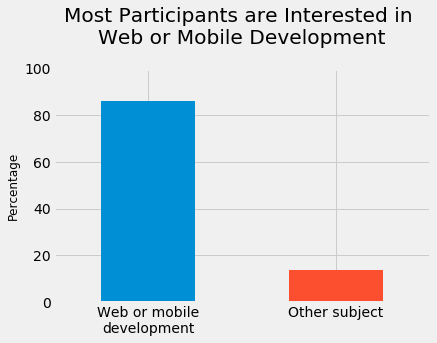

In [22]:
# Frequency table
web_or_mobile = job_interests_no_null.str.contains(
    'Web Developer|Mobile Developer') # returns an array of booleans

freq_table = web_or_mobile.value_counts(normalize = True) * 100
print("Web or Mobile Developer Frequency Table:\n{0}\n".format(freq_table))

# Frequency Table Graph
plt.style.use('fivethirtyeight')

freq_table.plot.bar()
plt.title('Most Participants are Interested in \nWeb or Mobile Development',
         y = 1.08) # y pads the title upward
plt.ylabel('Percentage', fontsize = 12)
plt.xticks([0,1], ['Web or mobile\ndevelopment', 'Other subject'],
          rotation = 0) # the initial xticks labels are True and False
plt.ylim([0, 100])
plt.show()

**Observations**:

A majority of people (86%) are interested in either Web or Mobile development. These figures offer us a strong reason to consider this sample representative for our population of interest. We want to advertise our courses to people interested in all sorts of programming niches but mostly Web and Mobile development.

Next we need to figure out what are the best markets to invest money in for advertising our courses. We'd like to know:
- Where are these new coders located.
- What are the locations with the greatest number of new coders.
- How much money new coders are willing to spend on learning.

---

## New Coders - Locations and Densities


Now that we found out that the sample has the right categories of people for our purpose, we can begin analyzing it. Let's start with finding out where these new coders are located, and what are the densities (how many coderes there are) for each location. This should be a good start for finding out the best two markets to run our ads campaign in.

The data set provides information about the location of each participant at a country level. The `CountryCitizen` variable describes the country of origin for each participant, and the `CountryLive` variable describes what country each participants lives in (which may be different than the origin country).

The dataset provides location information at a country level, so we can think of each country as an individual market. We will re-frame our goal as finding the two best countries to advertise in.

One indicator of a good market is the number of potential customers — the more potential customers in a market, the better. If our ads manage to convince 10% of the 5000 potential customers in market A to buy our product, then this is better than convincing 100% of the 30 potential customers in market B.

---

## Spending Money for Learning

---

## Dealing with Extreme Outliers

---

## Choosing the Two Best Markets

---

## Next Steps